
### Project-03 Avacodo.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocad
.Your task is to make a mode that can consider the data provided and predict the Average Price.

In [65]:
# importing project dependencies:

#  Numpy and Pandas 
import numpy as np
import pandas as pd

# visualization dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats

# feature_engineering dependency
import feature_engine

#Warnings Filetering 
import warnings
warnings.filterwarnings('ignore')

In [9]:
# importing the dataset
df = pd.read_csv('avocado.csv',parse_dates=['Date'])

In [10]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
df.drop('Unnamed: 0',axis=1,inplace =True)

In [19]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Features and Targets:
INPUT FEATURES:'
Unnamed: 0', 'Date', 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type','year', 'region']
 
TARGET FEATURE: 'AveragePrice'

In [20]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())

Size of dataset 
  (18249, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB
Details dataset
 None 

Che

The dataset consists of 18249  data for  12 Features and 1 target with no missing /Null Values.

In [56]:
num_var = np.array(['AveragePrice',
  'Total Volume',
  'Small(4046)',
  'Large(4225)',
 'Extra_Large(4770)',
  'Total Bags',
  'Small Bags',
  'Large Bags',
  'XLarge Bags',
  'year'])

In [23]:
cat_var =np.array(['type', 'region'])

we have 12 numerical type variables and 2 categorical type variables

In [25]:

# description of the categorcal features
df.describe(include=np.object)

,type,region
count,18249,18249
unique,2,54
top,conventional,Tampa
freq,9126,338


In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [27]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
def fig_this_size(x,y):
    
    return plt.figure(figsize=(x,y))

<AxesSubplot:>

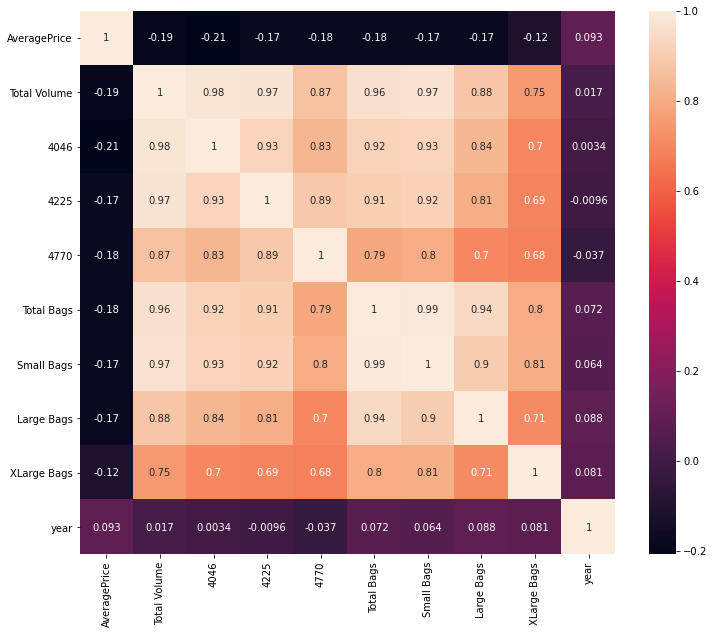

In [29]:
# correlation of the features in the dataset.
df.corr()
fig_this_size(12,10)
sns.heatmap(df.corr(),annot=True)


### EDA

In [ ]:
#Target average price 

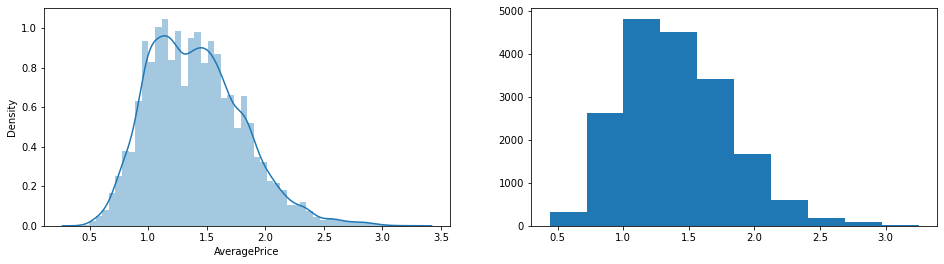

In [31]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df.AveragePrice)

fig.add_subplot(122)
plt.hist(df.AveragePrice);

In [ ]:
All the prices for avocado within  3 Dollars.

4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

PLU is Price LookUP

In [41]:
df.rename(columns={'4046':'Small(4046)','4225':'Large(4225)','4770':'Extra_Large(4770)'},inplace=True)

In [42]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [43]:
# Check data of many years is present
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

The dataset consists drop from the year 2015 and 2016, mostly from year 2016.

In [44]:
# Let's do a region wise comparision
df_region_gp = df.groupby('region').mean().reset_index()

In [45]:
df_region_gp.head()

,region,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,Albany,1.561036,47537.869734,1824.081775,37621.208254,162.832337,7929.747367,6647.765473,1153.496213,128.488639,2016.147929
1,Atlanta,1.337959,262145.322041,146116.867959,31218.510385,311.385769,84498.560888,51605.727337,32070.044556,822.786036,2016.147929
2,BaltimoreWashington,1.534231,398561.891479,35656.218166,245982.888876,12466.730976,104456.053462,100939.683195,2903.984586,612.382722,2016.147929
3,Boise,1.348136,42642.567308,20019.507604,3461.682367,3186.787840,15974.592456,13840.037249,2103.634083,30.915207,2016.147929
4,Boston,1.530888,287792.854527,4994.610059,214219.864290,4982.294970,63596.085207,58906.590355,4438.364704,251.124231,2016.147929


In [50]:
df_plu = df.groupby('region').sum()['Small(4046) Large(4225) Extra_Large(4770)'.split()]

In [51]:
df_plu

,Small(4046),Large(4225),Extra_Large(4770)
region,,,
Albany,6.165396e+05,1.271597e+07,5.503733e+04
Atlanta,4.938750e+07,1.055186e+07,1.052484e+05
BaltimoreWashington,1.205180e+07,8.314222e+07,4.213755e+06
Boise,6.766594e+06,1.170049e+06,1.077134e+06
Boston,1.688178e+06,7.240631e+07,1.684016e+06
BuffaloRochester,6.005149e+05,1.070242e+07,4.878556e+04
California,3.989670e+08,3.514914e+08,3.184105e+07
Charlotte,7.563811e+06,1.238027e+07,3.913522e+06
Chicago,1.084408e+07,8.602744e+07,1.996539e+07


Demand for 4770 ,Extra large is very less

In [81]:
df_cali[df_cali.year == 2015].sort_values('Date')

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
9489,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California
9488,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California
362,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California
361,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9440,2015-12-13,1.39,98605.40,13609.24,46518.56,3.05,38474.55,24359.79,14114.76,0.00,organic,2015,California
313,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
9439,2015-12-20,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.00,organic,2015,California
9438,2015-12-27,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.00,organic,2015,California


In [82]:
df_cali[df_cali.year == 2016].sort_values('Date')

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3171,2016-01-03,0.73,7730431.28,2315175.35,2856102.41,257268.16,2301885.36,1950428.50,340852.13,10604.73,conventional,2016,California
12296,2016-01-03,1.43,122089.29,18211.06,66433.31,0.00,37444.92,30530.14,6914.78,0.00,organic,2016,California
12295,2016-01-10,1.33,138580.98,17520.67,60382.97,0.00,60677.34,45417.90,15259.44,0.00,organic,2016,California
3170,2016-01-10,0.87,6303406.82,1736168.01,2173554.18,261931.07,2131753.56,1793640.16,321613.97,16499.43,conventional,2016,California
3169,2016-01-17,0.90,6000013.23,1653347.69,2336705.19,250106.17,1759854.18,1579233.60,162289.68,18330.90,conventional,2016,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12247,2016-12-11,1.64,128204.63,20010.88,59840.22,49.16,48304.37,37233.95,11070.42,0.00,organic,2016,California
3121,2016-12-18,0.95,4922621.54,1575318.71,1774200.38,90983.73,1482118.72,1313839.11,135367.97,32911.64,conventional,2016,California
12246,2016-12-18,1.61,122728.42,18006.04,60993.65,176.75,43551.98,37872.37,5679.61,0.00,organic,2016,California
12245,2016-12-25,1.53,132890.31,22779.87,56237.83,10.76,53861.85,43478.17,10383.68,0.00,organic,2016,California


In [83]:
df_cali[df_cali.year == 2017].sort_values('Date')

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5986,2017-01-01,0.89,7175276.66,2266313.37,2877688.31,90899.53,1940375.45,1762033.74,151333.95,27007.76,conventional,2017,California
15111,2017-01-01,1.46,164137.04,31267.65,65430.27,6.16,67432.96,50963.98,16468.98,0.00,organic,2017,California
15110,2017-01-08,1.50,177777.40,33563.39,69671.75,4.62,74537.64,69842.47,4695.17,0.00,organic,2017,California
5985,2017-01-08,1.00,6653048.21,1988635.39,2569566.25,109029.01,1985817.56,1807926.97,144375.50,33515.09,conventional,2017,California
5984,2017-01-15,0.93,6656554.36,2075029.62,2450277.12,95137.62,2036110.00,1910596.03,99912.91,25601.06,conventional,2017,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,2017-12-17,1.75,126089.01,24044.07,55284.97,0.00,46759.97,46698.32,61.65,0.00,organic,2017,California
5935,2017-12-24,1.13,5346535.57,1934361.67,1934710.69,116855.41,1360607.80,1277612.22,21328.12,61667.46,conventional,2017,California
15060,2017-12-24,1.82,138506.44,25276.34,58176.83,0.00,55053.27,54984.78,68.49,0.00,organic,2017,California
15059,2017-12-31,1.71,160039.02,46373.36,55040.01,0.00,58625.65,58526.97,98.68,0.00,organic,2017,California


In [84]:
df_cali[df_cali.year == 2018].sort_values('Date')

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8561,2018-01-07,1.19,5756632.36,2350838.88,1704810.36,135053.06,1565930.06,1465321.32,25951.12,74657.62,conventional,2018,California
17684,2018-01-07,1.95,156341.57,42992.91,56007.79,0.00,57340.87,57271.15,69.72,0.00,organic,2018,California
17683,2018-01-14,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,organic,2018,California
8560,2018-01-14,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,1226559.09,25390.97,68898.86,conventional,2018,California
8559,2018-01-21,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,1431898.88,24801.59,61880.70,conventional,2018,California
17682,2018-01-21,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,organic,2018,California
8558,2018-01-28,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,1480527.70,24545.94,67748.62,conventional,2018,California
17681,2018-01-28,1.87,170998.81,30070.62,58357.89,0.00,82570.30,82563.11,7.19,0.00,organic,2018,California
8557,2018-02-04,0.80,10894677.77,4473811.63,4097591.67,146357.78,2176916.69,2072477.62,34196.27,70242.80,conventional,2018,California
17680,2018-02-04,1.56,188212.98,38078.53,60551.97,0.00,89582.48,89527.66,54.82,0.00,organic,2018,California


In [52]:
#Total Volume

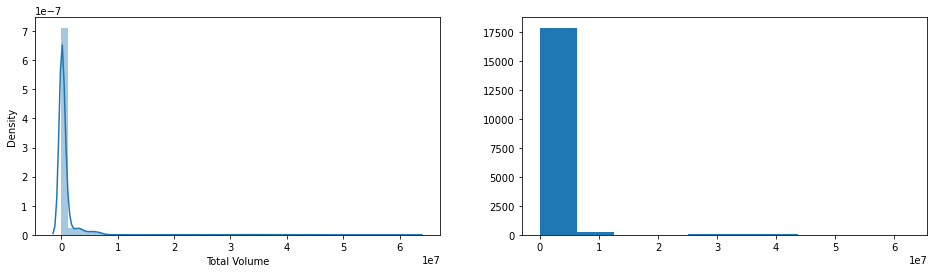

In [53]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df['Total Volume'])

fig.add_subplot(122)
plt.hist(df['Total Volume']);

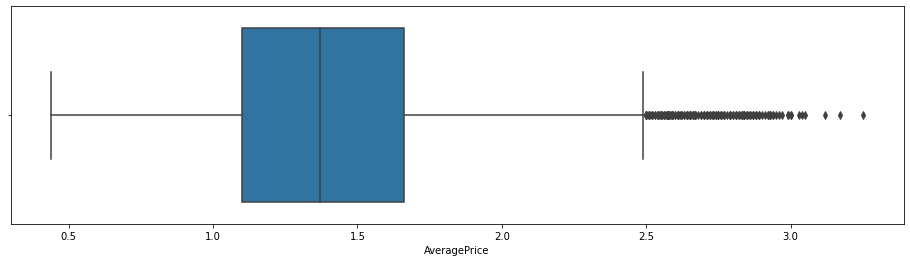

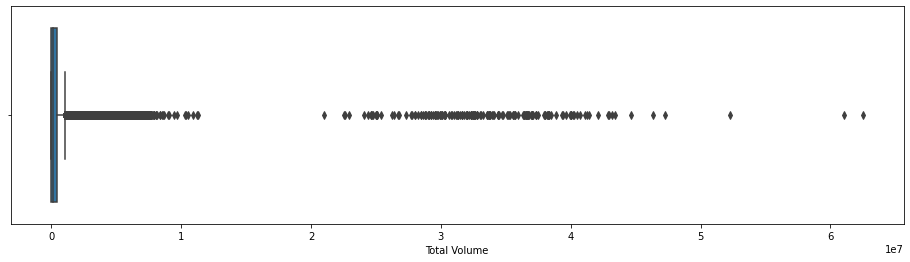

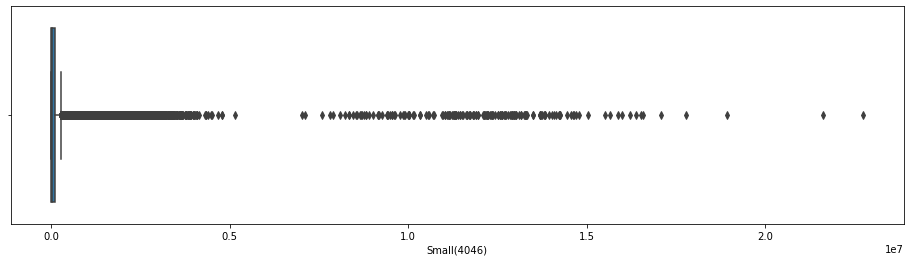

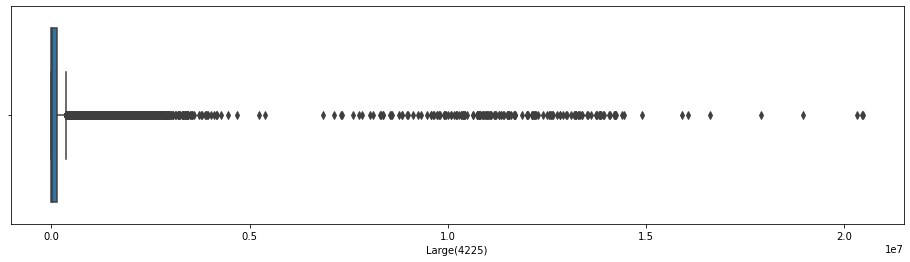

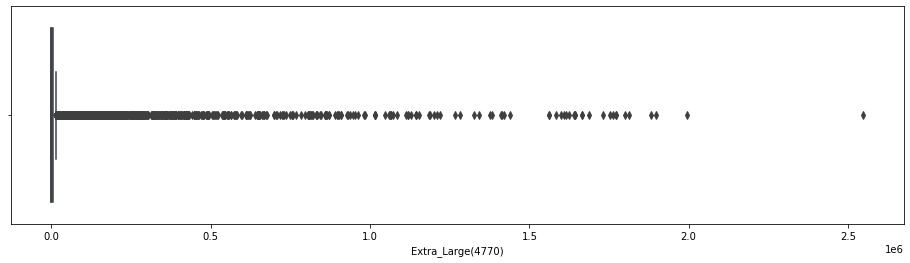

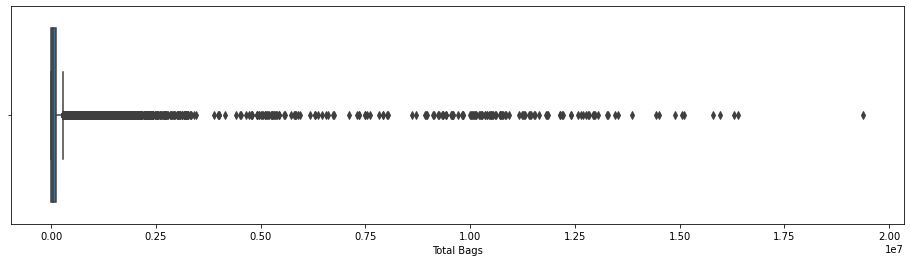

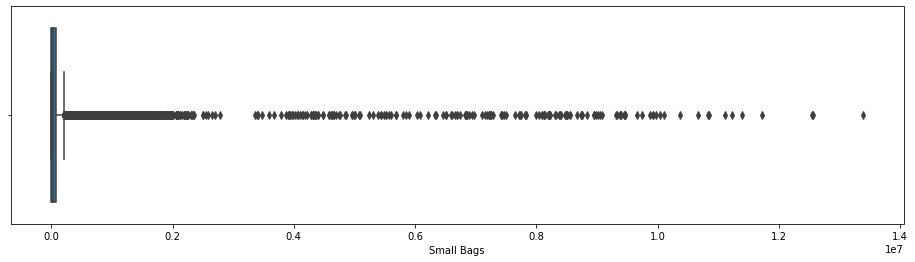

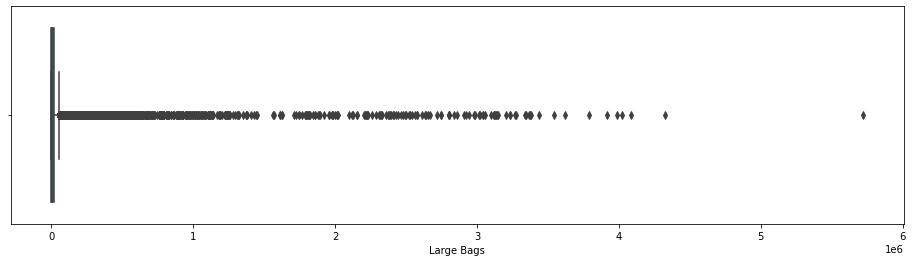

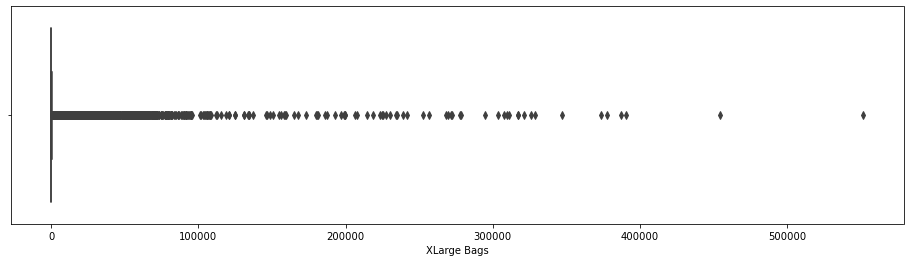

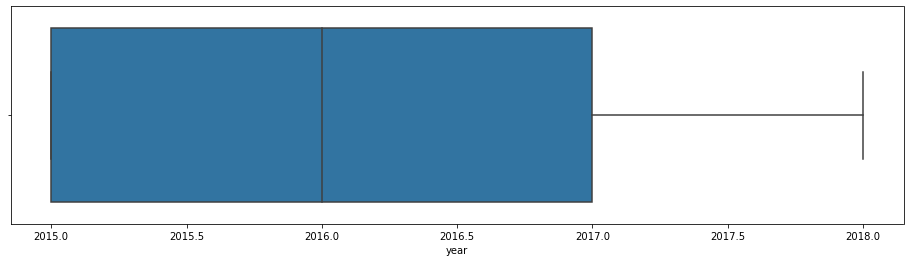

In [60]:
#box plot of each of the feautre

for col in num_var:
    fig_this_size(16,4)
    sns.boxplot(df[col])

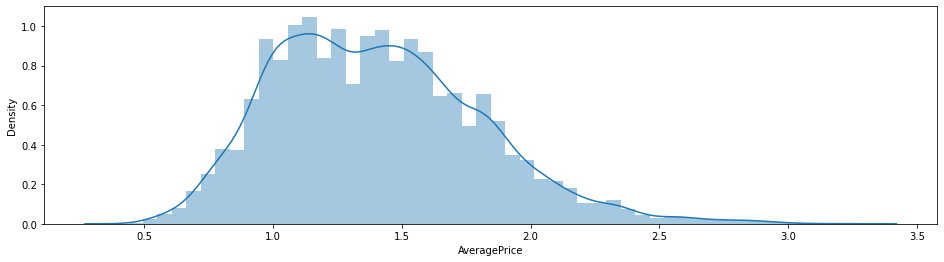

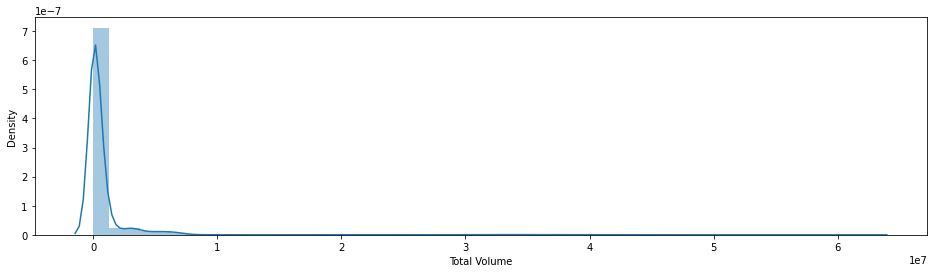

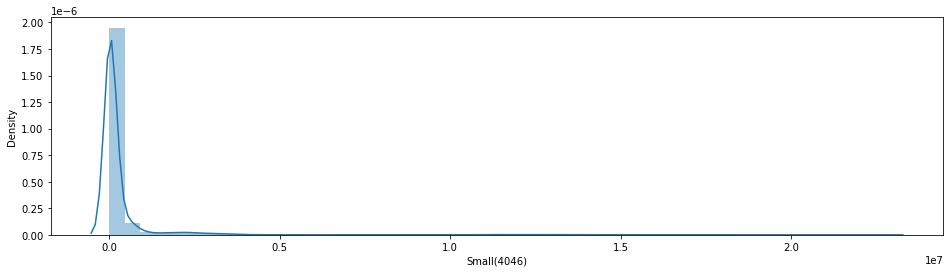

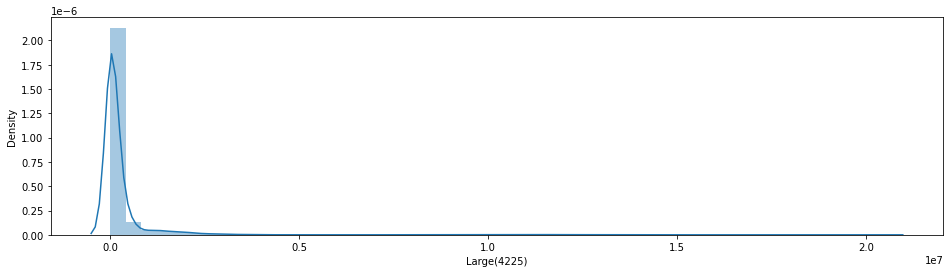

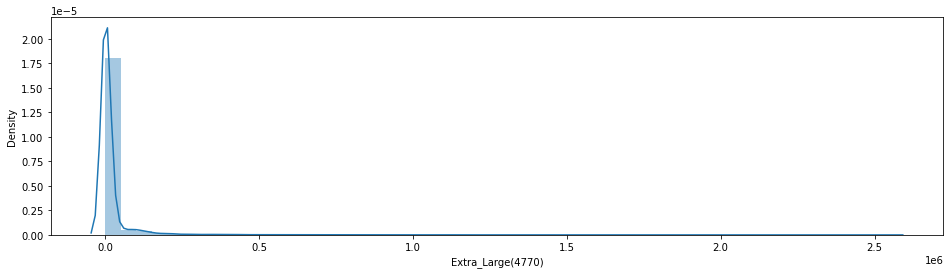

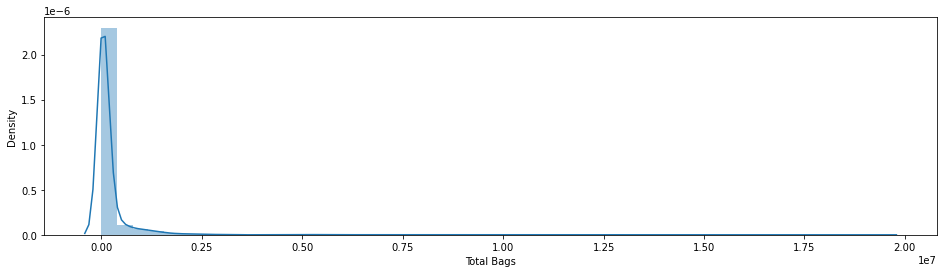

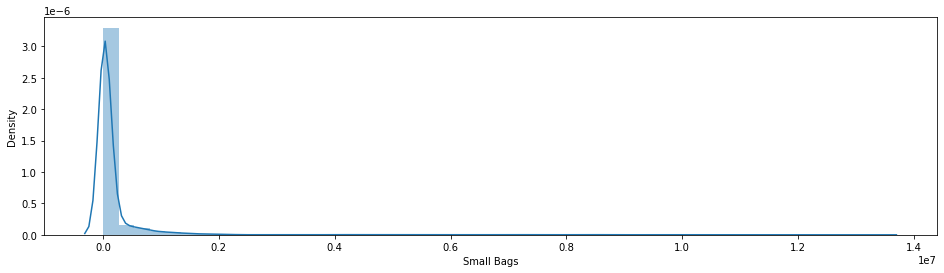

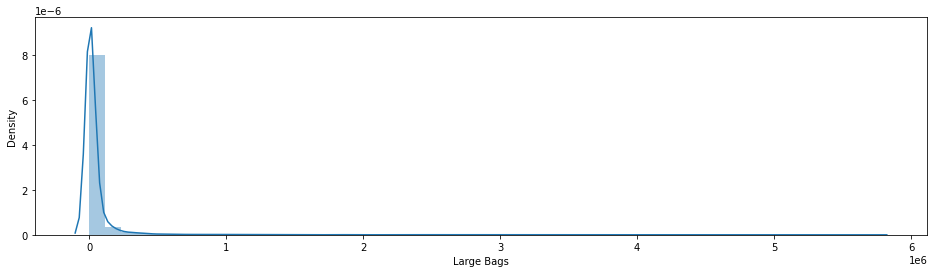

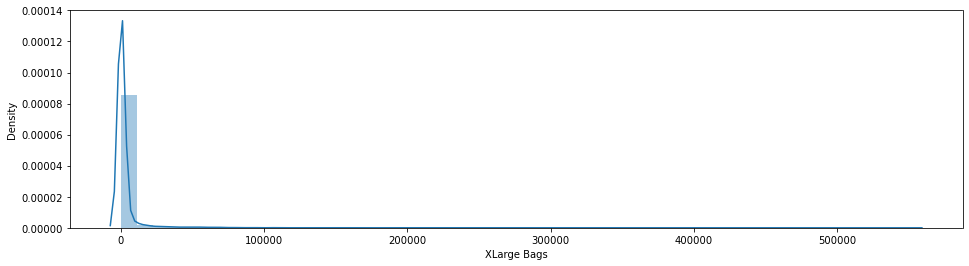

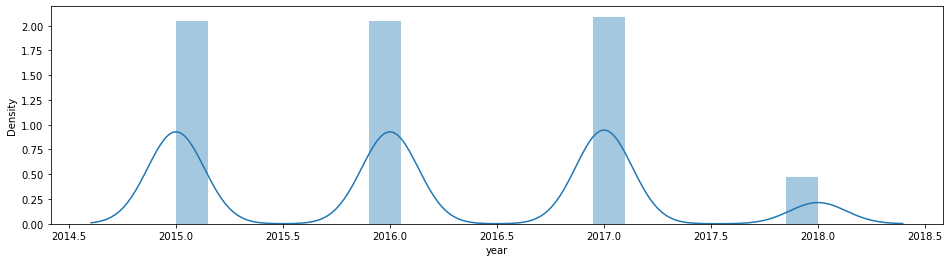

In [61]:
# distplot of each of the feautre

for col in num_var:
    fig_this_size(16,4)
    sns.distplot(df[col])

All the data except the Average Price are very highly skewed

In [62]:
df.skew()

AveragePrice          0.580303
Total Volume          9.007687
Small(4046)           8.648220
Large(4225)           8.942466
Extra_Large(4770)    10.159396
Total Bags            9.756072
Small Bags            9.540660
Large Bags            9.796455
XLarge Bags          13.139751
year                  0.215339
dtype: float64

In [63]:
# let's remove the outliers using the z-score method

In [66]:
z_scores = stats.zscore(df[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df[filtered_entries]

In [67]:
len(df_cleaned)

17651

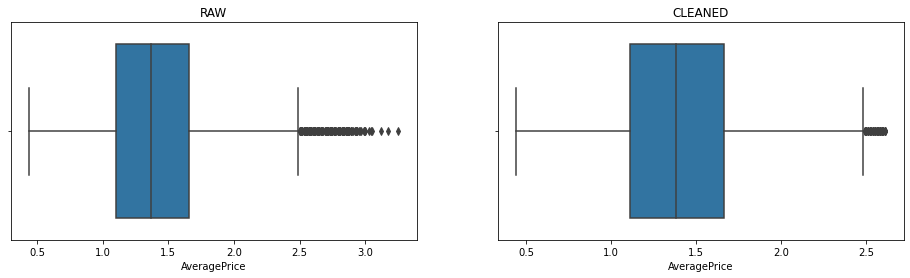

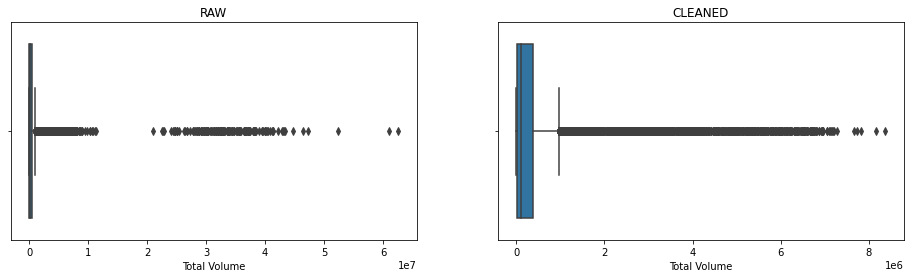

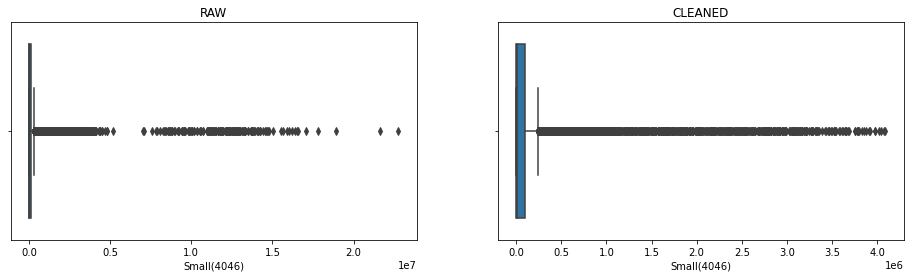

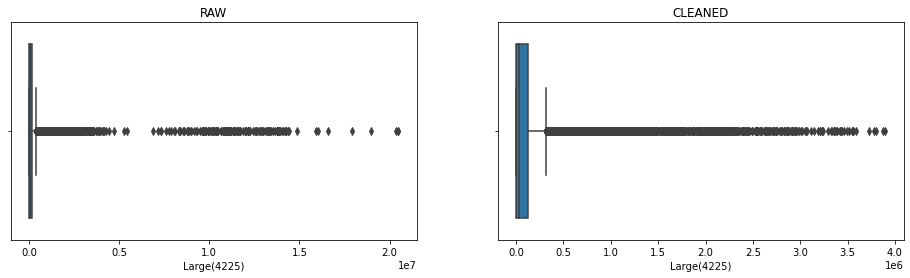

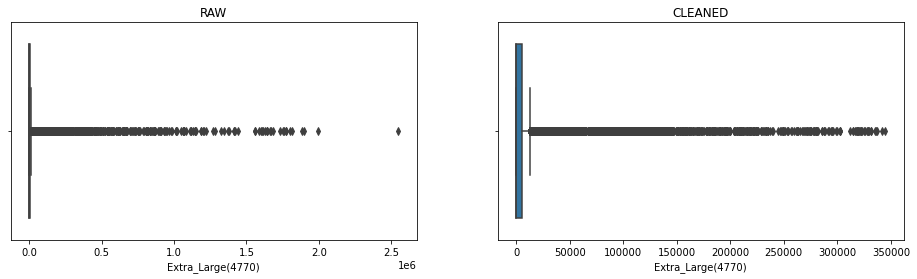

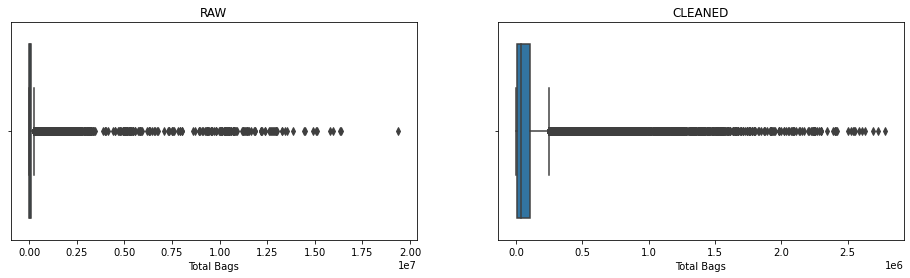

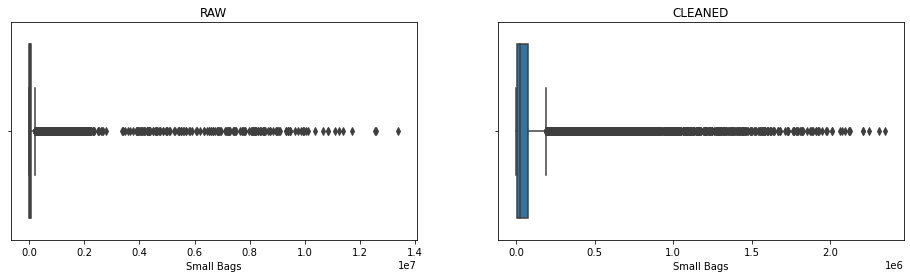

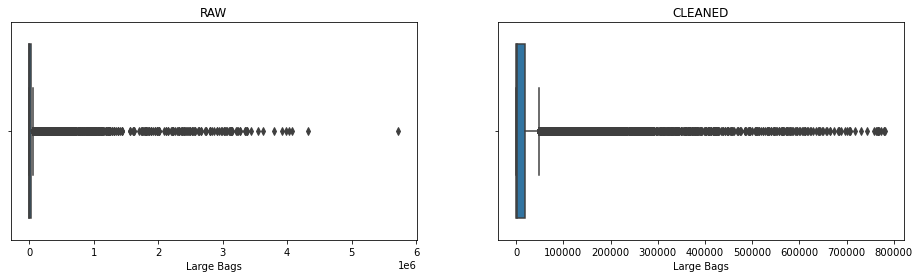

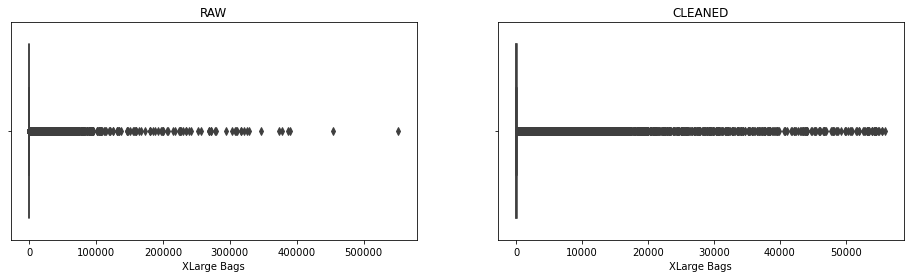

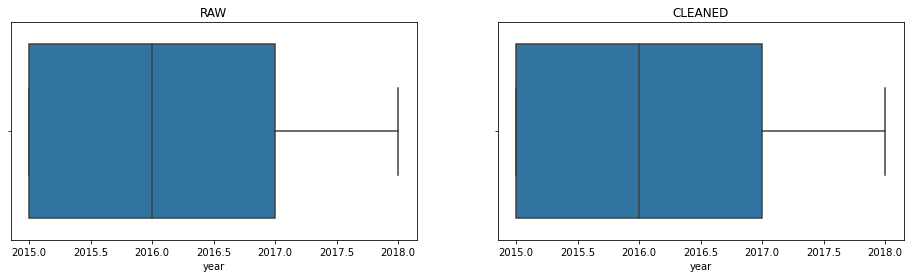

In [68]:
for col in num_var:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('RAW')
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('CLEANED')

In [69]:
df_cleaned.skew()

AveragePrice         0.377432
Total Volume         3.767138
Small(4046)          4.909848
Large(4225)          4.455745
Extra_Large(4770)    5.117170
Total Bags           4.066771
Small Bags           4.222706
Large Bags           5.053434
XLarge Bags          6.135607
year                 0.229976
dtype: float64

In [70]:
# Applying log transformation
np.log(df_cleaned[num_var]+1).skew()

AveragePrice         0.007458
Total Volume        -0.049950
Small(4046)         -0.420273
Large(4225)         -0.604619
Extra_Large(4770)    0.068532
Total Bags          -0.384493
Small Bags          -0.788988
Large Bags          -0.610874
XLarge Bags          1.216238
year                 0.229335
dtype: float64

In [71]:
# Applying sqrt transformation
np.sqrt(df_cleaned[num_var]).skew()

AveragePrice         0.052393
Total Volume         1.963864
Small(4046)          2.497504
Large(4225)          2.128505
Extra_Large(4770)    2.636658
Total Bags           2.010691
Small Bags           2.093752
Large Bags           2.236756
XLarge Bags          3.312484
year                 0.229656
dtype: float64

In [72]:
df_cleaned[num_var] = np.log(df_cleaned[num_var]+1)

In [73]:
df_cleaned.skew()

AveragePrice         0.007458
Total Volume        -0.049950
Small(4046)         -0.420273
Large(4225)         -0.604619
Extra_Large(4770)    0.068532
Total Bags          -0.384493
Small Bags          -0.788988
Large Bags          -0.610874
XLarge Bags          1.216238
year                 0.229335
dtype: float64

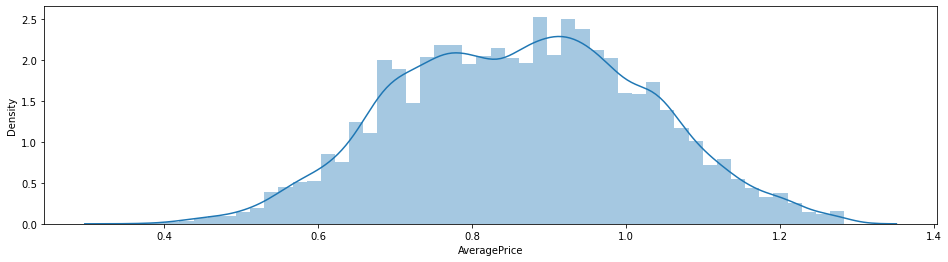

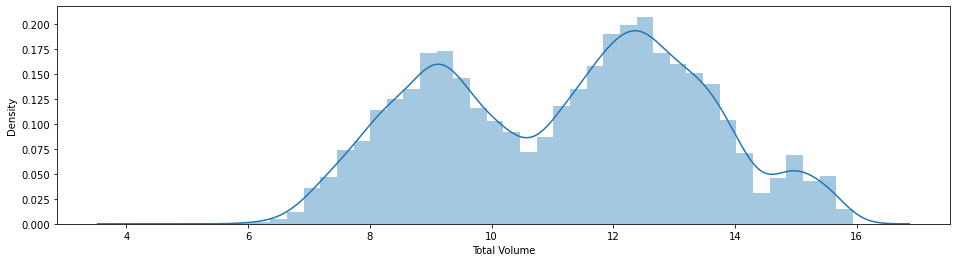

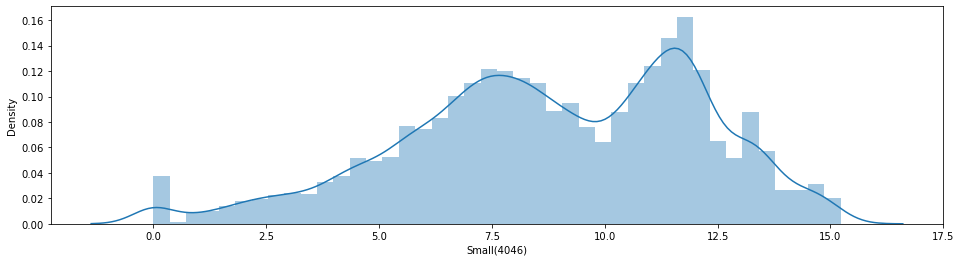

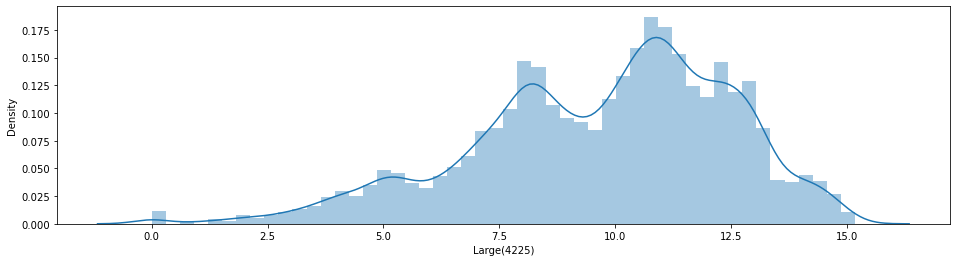

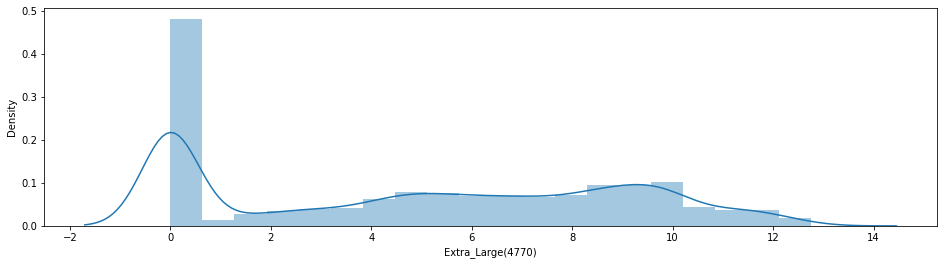

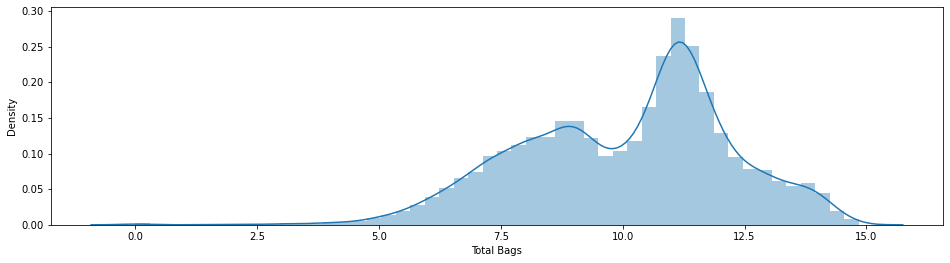

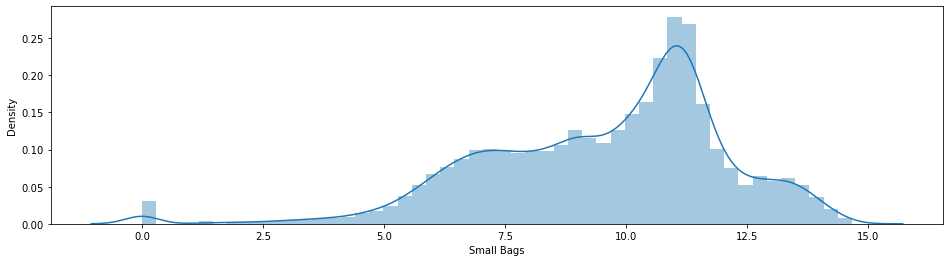

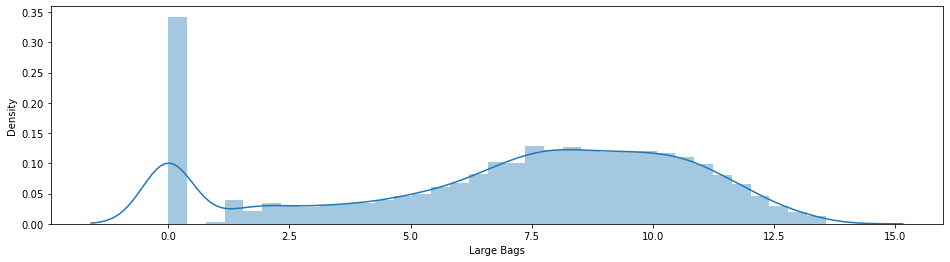

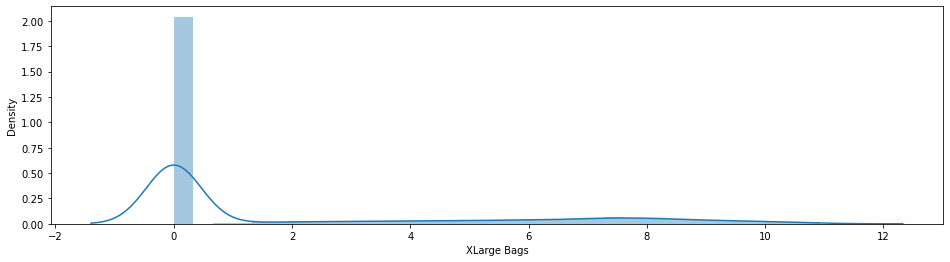

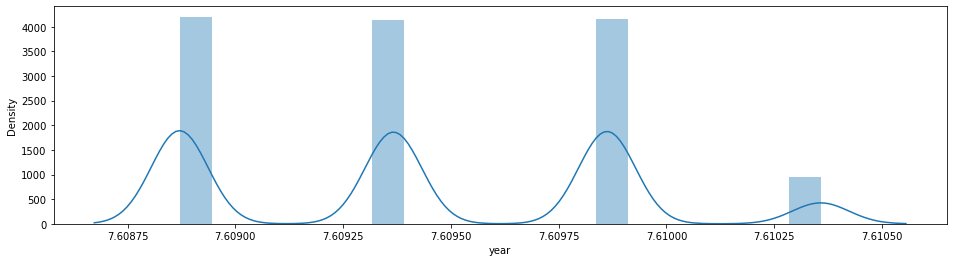

In [74]:
for col in num_var:
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

In [75]:
df_cleaned

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,Albany
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,Albany
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,Albany
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,Albany
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,organic,7.610358,WestTexNewMexico
18245,2018-01-28,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,organic,7.610358,WestTexNewMexico
18246,2018-01-21,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,organic,7.610358,WestTexNewMexico
18247,2018-01-14,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,organic,7.610358,WestTexNewMexico


In [76]:
df_cleaned['month'] =df_cleaned.Date.apply(lambda x:x.month_name())

In [77]:
df_cleaned

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,Albany,December
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,Albany,December
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,Albany,December
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,Albany,December
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,Albany,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,organic,7.610358,WestTexNewMexico,February
18245,2018-01-28,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,organic,7.610358,WestTexNewMexico,January
18246,2018-01-21,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,organic,7.610358,WestTexNewMexico,January
18247,2018-01-14,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,organic,7.610358,WestTexNewMexico,January


In [80]:
df_cali = df[df.region == 'California']
df_cali

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,2018-02-04,1.56,188212.98,38078.53,60551.97,0.00,89582.48,89527.66,54.82,0.00,organic,2018,California
17681,2018-01-28,1.87,170998.81,30070.62,58357.89,0.00,82570.30,82563.11,7.19,0.00,organic,2018,California
17682,2018-01-21,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,organic,2018,California
17683,2018-01-14,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,organic,2018,California


In [87]:
df_cleaned.corr()

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.585794,-0.546454,-0.442157,-0.503062,-0.568331,-0.474541,-0.471817,-0.365343,0.091980
Total Volume,-0.585794,1.000000,0.875354,0.900066,0.818046,0.928706,0.863335,0.644861,0.614247,0.082426
Small(4046),-0.546454,0.875354,1.000000,0.739737,0.725446,0.765438,0.716691,0.552370,0.539334,0.002059
Large(4225),-0.442157,0.900066,0.739737,1.000000,0.775653,0.771848,0.696343,0.586721,0.542787,0.006840
Extra_Large(4770),-0.503062,0.818046,0.725446,0.775653,1.000000,0.750909,0.723369,0.525201,0.603807,-0.051740
Total Bags,-0.568331,0.928706,0.765438,0.771848,0.750909,1.000000,0.920842,0.685630,0.584338,0.225820
Small Bags,-0.474541,0.863335,0.716691,0.696343,0.723369,0.920842,1.000000,0.486811,0.551761,0.205364
Large Bags,-0.471817,0.644861,0.552370,0.586721,0.525201,0.685630,0.486811,1.000000,0.420044,0.192872
XLarge Bags,-0.365343,0.614247,0.539334,0.542787,0.603807,0.584338,0.551761,0.420044,1.000000,0.165597
year,0.091980,0.082426,0.002059,0.006840,-0.051740,0.225820,0.205364,0.192872,0.165597,1.000000


<AxesSubplot:>

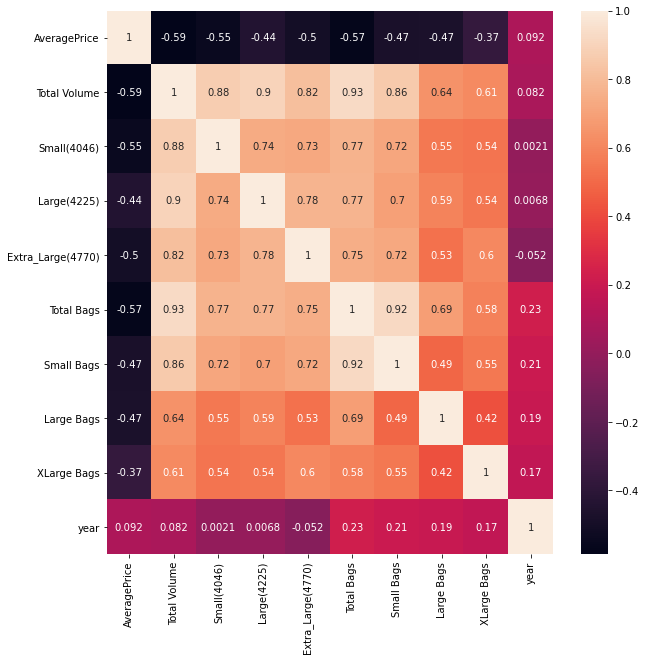

In [88]:
# Visualize
fig_this_size(10,10)
sns.heatmap(df_cleaned.corr(),annot=True)

* Total Bagsand Samll bags very much corrralated , we can remove one for modelling .

In [89]:
df_cleaned.head()


,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,Albany,December
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,Albany,December
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,Albany,December
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,Albany,December
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,Albany,November


In [90]:
(df_cleaned[df_cleaned['XLarge Bags']!=0]['Extra_Large(4770)']-df_cleaned[df_cleaned['XLarge Bags']!=0]['XLarge Bags'])

24       4.820686
38      -0.104231
54       2.947080
55       3.898017
56       2.497648
           ...   
18232   -1.336277
18233   -0.089600
18234    0.652942
18235    3.500104
18236    1.841407
Length: 5720, dtype: float64

<AxesSubplot:>

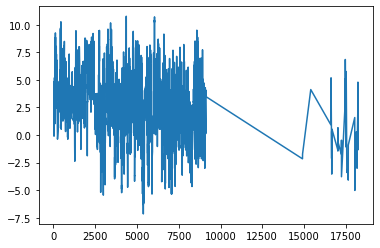

In [91]:
(df_cleaned[df_cleaned['XLarge Bags']!=0]['Extra_Large(4770)']-df_cleaned[df_cleaned['XLarge Bags']!=0]['XLarge Bags']).plot()

In [92]:
# removing the redudant columns
df_cleaned = df_cleaned.drop(['Date','Total Bags','type'],axis =1)

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
lab_enc =LabelEncoder()
df_cleaned["region"]  = lab_enc.fit_transform(df_cleaned['region'])
df_cleaned["month"]  = lab_enc.fit_transform(df_cleaned['month'])


In [95]:
df_cleaned

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Small Bags,Large Bags,XLarge Bags,year,region,month
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,7.608871,0,2
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,7.608871,0,2
2,0.657520,11.680313,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,7.608871,0,2
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,7.608871,0,2
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,7.608871,0,9
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,7.610358,53,3
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,7.610358,53,4
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,7.610358,53,4
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,7.610358,53,4


In [107]:
# Splitting the dataset into X and y.
x = df_cleaned.drop(['AveragePrice'],axis =1)
y = df_cleaned['AveragePrice']

In [102]:
# feature scaling
from sklearn.preprocessing import StandardScaler


In [108]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [111]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [112]:
#shapes
print ('XTRAIN \n',x_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',x_test.shape)
print ('YTRAIN \n',y_test.shape)

XTRAIN 
 (12355, 10)
YTRAIN 
 (12355,)
XTEST 
 (5296, 10)
YTRAIN 
 (5296,)


In [114]:
# fitting the data(training the model)
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [115]:
# importing the evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [118]:
# Reusable Model funciton
def train_n_ret_scores(model):
    model.fit(x_train,y_train)
    print('Train_Acc:', model.score(x_test,y_test))
    print('Test_Acc:', model.score(x_test,y_test))
    print('R2:', r2_score(y_test,model.predict(x_test)))
    print('MSE:',mean_squared_error(y_test,model.predict(x_test)))

In [119]:
# Model1: Linear Regression
train_n_ret_scores(LinearRegression())

Train_Acc: 0.46382684390865225
Test_Acc: 0.46382684390865225
R2: 0.46382684390865225
MSE: 0.01382434887016844


In [120]:
# Model2: Ridge Regressor
train_n_ret_scores(Ridge(alpha=0.001))

Train_Acc: 0.4630636061901051
Test_Acc: 0.4630636061901051
R2: 0.4630636061901051
MSE: 0.013844027707820412


In [121]:
# Model3: Lasso
train_n_ret_scores(Lasso(alpha=0.00001))

Train_Acc: 0.44678335377229683
Test_Acc: 0.44678335377229683
R2: 0.44678335377229683
MSE: 0.014263787418953434


In [122]:
# Model4: Elastic
train_n_ret_scores(ElasticNet(alpha=0.00001))

Train_Acc: 0.4430062683662488
Test_Acc: 0.4430062683662488
R2: 0.4430062683662488
MSE: 0.014361173395428417


In [123]:
# MOdel5 : knn
train_n_ret_scores(KNeighborsRegressor(n_jobs=5))

Train_Acc: 0.7775334570716966
Test_Acc: 0.7775334570716966
R2: 0.7775334570716966
MSE: 0.005735936360188096


In [124]:
#Model 6 : Decision tree
train_n_ret_scores(DecisionTreeRegressor())

Train_Acc: 0.7193696720620527
Test_Acc: 0.7193696720620527
R2: 0.7193696720620527
MSE: 0.007235594533015012


In [125]:
# SVR
train_n_ret_scores(SVR(kernel='rbf',C=100))

Train_Acc: 0.6723008280763708
Test_Acc: 0.6723008280763708
R2: 0.6723008280763708
MSE: 0.00844918777762485


In [134]:
# chossing the best model


models = [LinearRegression(),Ridge(),Lasso(),ElasticNet(),SVR(),KNeighborsRegressor(n_neighbors=5),DecisionTreeRegressor()]
model_names = 'Linear_reg Ridge SVR  Lasso ElasticNet KNN Random_forest Decision_Tree'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','R2','MSE','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(x_train,y_train)
    
    y_preds = model.predict(x_test)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    r2 = r2_score(y_test,y_preds)
    mse = mean_squared_error(y_test,y_preds)
    
    avg_cv = np.mean(cross_val_score(model,x_train,y_train,cv=5))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'R2':r2,'MSE':mse,'Avg_CV':avg_cv},ignore_index=True)
    models_df 

Linear_reg
Ridge
SVR
Lasso
ElasticNet
KNN
Random_forest


In [135]:
 models_df

,Algo,Train_acc,Test_acc,R2,MSE,Avg_CV
0,Linear_reg,0.461307,0.463827,0.463827,0.013824,0.460275
1,Ridge,0.432704,0.442218,0.442218,0.014381,0.431547
2,SVR,0.000000,-0.000278,-0.000278,0.025791,-0.000919
3,Lasso,0.000000,-0.000278,-0.000278,0.025791,-0.000919
4,ElasticNet,0.594984,0.587789,0.587789,0.010628,0.582498
5,KNN,0.861423,0.777533,0.777533,0.005736,0.752695
6,Random_forest,1.000000,0.716349,0.716349,0.007313,0.714360


### KNN   REGRESSON is the best one 
## HYPER PARAMETER TUNING TO BE DONE on KNN


In [129]:
from sklearn.model_selection import GridSearchCV

In [132]:
KNeighborsRegressor().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [136]:
param ={'algorithm' :['kd_tree', 'brute'] ,'leaf_size':[15,18,25] ,'n_jobs' : [1,2], 'n_neighbors' :[4,6,8,12]}
GSV = GridSearchCV(KNeighborsRegressor(),param,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 25], 'n_jobs': [1, 2],
                         'n_neighbors': [4, 6, 8, 12]})

In [137]:
GSV.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_jobs': 1, 'n_neighbors': 4}

In [ ]:
### Modelling Using best parameters

In [143]:
#Using  Regression models 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
KNN_HT = KNeighborsRegressor(algorithm ='kd_tree', leaf_size= 15,n_jobs= 1 , n_neighbors=4)
KNN_HT.fit(x_train, y_train)
KNN_HT_y_pred =KNN_HT.predict(x_test)
R2_KNN_HT_score =r2_score(y_test,KNN_HT_y_pred)

print('R2_SCORE:',R2_KNN_HT_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,KNN_HT_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,KNN_HT_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,KNN_HT_y_pred)))

R2_SCORE: 0.7848138972878713
Mean Absolute Error_LR: 0.05440422553361499
Mean Squared Error_LR: 0.005548222103453362
Root Mean Squared Error_LR: 0.0744863887126592


 * EFFICIANCY ACHIEVED

R2_SCORE: 0.7848138972878713

Mean Absolute Error_LR: 0.05440422553361499

Mean Squared Error_LR: 0.005548222103453362

Root Mean Squared Error_LR: 0.0744863887126592

In [145]:
print(KNN_HT_y_pred[:50],)
print(y_test[:50].values)

[0.89897508 0.94478849 0.82602459 0.69056959 1.02657803 0.81226193
 0.73917848 0.94460751 0.85907108 1.11858155 0.91782349 1.05286184
 0.56973807 0.78591387 0.72062544 0.76705349 0.72392959 0.89919438
 1.00582931 0.74993364 0.65336987 0.92929698 1.07078839 0.8818962
 1.0997925  0.98347555 1.00926999 0.72134217 0.9551487  0.70608363
 0.72495783 0.91295385 0.96117835 1.11466503 0.79998245 0.94644261
 0.73193184 0.93508403 0.66748435 1.14667029 0.93372541 0.77585775
 0.76517102 1.03917515 0.78012394 0.95469796 0.67930803 1.054862
 0.86257943 0.96310169]
[0.85866162 0.99325177 0.7975072  0.59332685 1.04731899 0.74193734
 0.74668795 0.97455964 0.88789126 1.03673688 0.81536481 1.08856195
 0.50077529 0.81536481 0.76080583 0.77932488 0.65752    0.95165788
 1.02245093 0.78390154 0.44468582 0.9439059  1.16315081 0.99694863
 1.11841492 1.01884732 1.06471074 0.68813464 0.77010822 0.68813464
 0.72754861 0.88789126 0.85015093 1.19694819 0.80647587 1.05431203
 0.67803354 0.76080583 0.65232519 1.20597

### Saving the model

In [148]:
#Dumping the model 
import joblib as jl
jl.dump(KNN_HT_y_pred,'AVACADO_case_study.pk')

['AVACADO_case_study.pk']